### Predicting MLB Player Salaries: A Batting Performance Analysis

### Exploratory Data Analysis
## Understanding Salary Determinants: An EDA of Performance Metrics and Player Earnings

In [1]:
def inflation_adjust(salary, salary_year, inflation_rates):
    """
    Adjusts salary for inflation using the US Consumer Price Index (CPI).
    
    Parameters
    ----------
    salary: float
        Salary to be adjusted.
    salary_year: int
        Year of salary.
    inflation_rates: pandas.Series
        CPI data indexed by year.
        
    Returns
    -------
    float
        Inflation-adjusted salary.
    """
    # Get CPI of salary year and current year
    current_year = max(inflation_rates.keys())
    inflation_adjustment = 1
    for year in range(salary_year, current_year):
        inflation_adjustment *= 1 + inflation_rates[year]
    return salary / inflation_adjustment

## Table of Contents
1. [Introduction](#Introduction)    

https://www.bls.gov/data/inflation_calculator.htm

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load data
df = pd.read_csv("Clean datasets/clean_batting_salary_allPA.csv")

In [4]:
# shape of dataset
print('Shape of dataset: ', df.shape)
print('Number of rows (Players/season): ', df.shape[0])
print('Number of columns (Features): ', df.shape[1])


Shape of dataset:  (15043, 101)
Number of rows (Players/season):  15043
Number of columns (Features):  101


In [5]:
# First 5 rows of dataset
df.head()

,playerID,yearID,stint,lgID_x,G_x,AB_x,R_x,H_x,2B_x,3B_x,...,RA,ER,DP,FP,name,park,attendance,BPF,PPF,teamIDBR
0,armasto01,1980,1,AL,158,628,87,175,18,8,...,642,566,115,0.979,Oakland Athletics,Oakland Coliseum,842259.0,93,93,OAK
1,bailobo01,1980,1,AL,117,347,44,82,14,2,...,762,683,206,0.979,Toronto Blue Jays,Exhibition Stadium,1400327.0,105,107,TOR
2,bandosa01,1980,1,AL,78,254,28,50,12,1,...,682,597,189,0.977,Milwaukee Brewers,County Stadium,1857408.0,97,96,MIL
3,baylodo01,1980,1,AL,90,340,39,85,12,2,...,797,717,144,0.978,California Angels,Anaheim Stadium,2297327.0,97,97,CAL
4,benchjo01,1980,1,NL,114,360,52,90,12,0,...,670,624,144,0.983,Cincinnati Reds,Riverfront Stadium,2022450.0,101,100,CIN


In [6]:
# dtypes of dataset
df.dtypes

playerID       object
yearID          int64
stint           int64
lgID_x         object
G_x             int64
               ...   
park           object
attendance    float64
BPF             int64
PPF             int64
teamIDBR       object
Length: 101, dtype: object

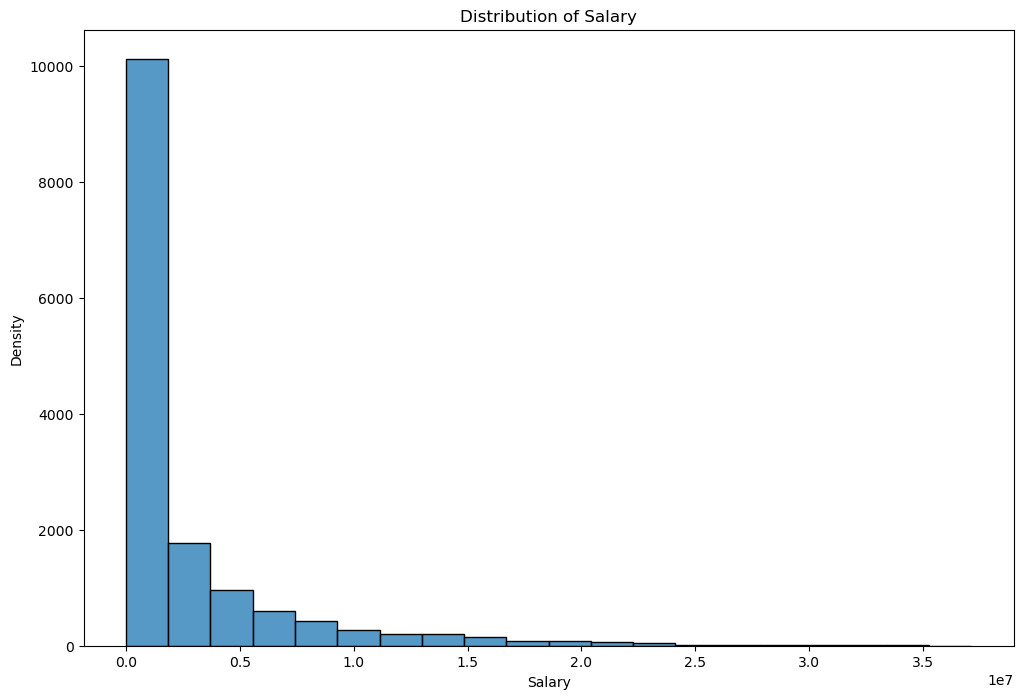

In [7]:
# distribution of salary
plt.figure(figsize=(12, 8))
sns.histplot(df['salary'], bins=20)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

In [8]:
# Juan Soto's salary
df[df['name_common'] == 'Andy Abad'][['salary', 'yearID']]

,salary,yearID
8605,327000.0,2006


In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# null 
df.isnull().sum()

playerID               0
yearID                 0
stint                  0
lgID_x                 0
G_x                    0
AB_x                   0
R_x                    0
H_x                    0
2B_x                   0
3B_x                   0
HR_x                   0
RBI                    0
SB_x                   0
CS_x                   0
BB_x                   0
SO_x                   0
IBB                    0
HBP_x                  0
SH                     0
SF_x                   0
GIDP                   0
name_common            0
age                    0
PA                     0
G_y                    0
Inn                    0
runs_bat               0
runs_br                0
runs_dp                0
runs_field             0
runs_infield           0
runs_outfield          0
runs_catcher           0
runs_defense           0
runs_position          0
runs_position_p        0
runs_replacement       0
runs_above_rep         0
runs_above_avg         0
runs_above_avg_off     0


In [10]:
# Show WAR null rows
df[df['WAR'].isnull()][['name_common', 'yearID', 'debut']]


,name_common,yearID,debut
11,Bernie Carbo,1980,1969-09-02
547,Jay Johnstone,1985,1966-07-30
1182,Onix Concepcion,1987,1980-08-30
1273,Keith Hughes,1987,1987-05-19
1580,Chris Chambliss,1988,1971-05-28
1661,Jerry Hairston,1988,1973-07-26
2420,Scott Cooper,1990,1990-09-05
2531,Rex Hudler,1990,1984-09-09
2587,Steve Lombardozzi,1990,1985-07-12
2635,Rob Nelson,1990,1986-09-09


In [11]:
# # Create a column for years since debut
# df['years_since_debut'] = df['yearID'] - df['debut']

# # Create a column that sums previous years' WAR
# df['cumulative_war'] = df.groupby('name_common')['WAR'].cumsum()

# Create a column for comulative PA
df.groupby('name_common')['H_x'].cumsum()[df['name_common'] == 'Derek Jeter']



4293      183
4773      373
5276      576
5797      795
6284      996
6719     1187
7133     1378
7551     1534
7971     1722
8385     1924
8799     2138
9205     2344
9623     2523
10074    2735
10521    2914
10933    3076
11364    3292
11796    3304
12225    3453
Name: H_x, dtype: int64